# 비모수검정

### 모수검정 vs 비모수검정 
통계적 검정에서 모집단의 모수에 대한 검정
1) 모수적 검정 방법 : 모집단의 분포에 대해 가정을 하고 검정 \
2) 비모수적 검정 방법(non-parametric test) : 자료가 추출된 모집단의 분포에 대해 아무런 제약을 가하지 않고 검정을 실시 \
*비모수적 검정방법의 가설은 비교하고자 하는 그룹들이 '분포의 형태가 동일한지' 또는 '분포의 형태가 동일하지 않은지'와 같이 \
분포의 형태에 대해 설정한다.

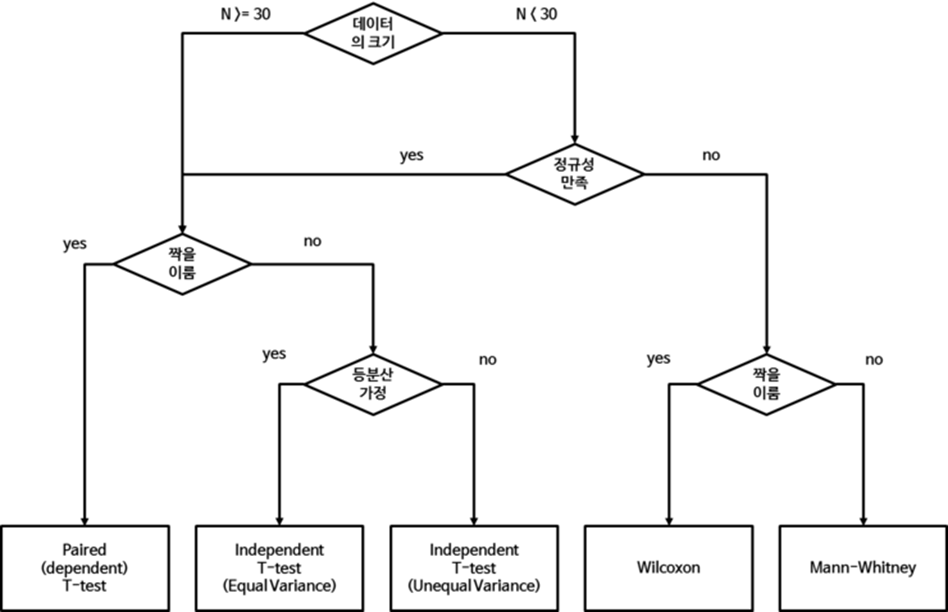

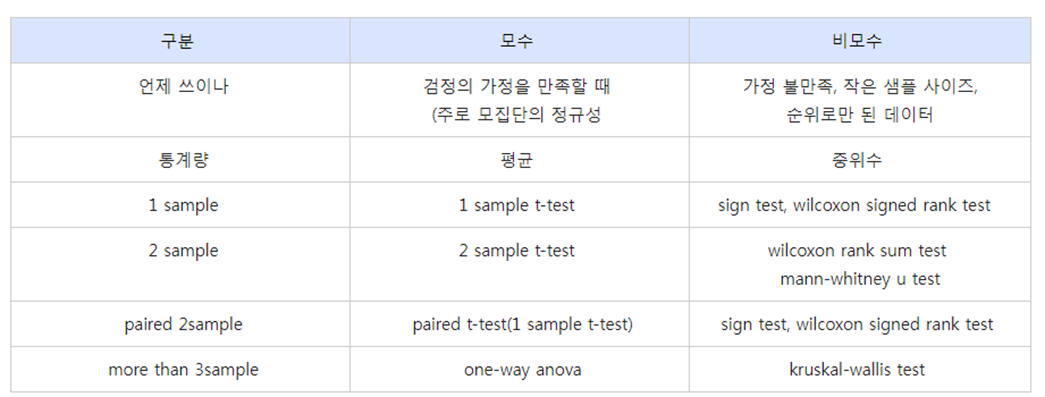

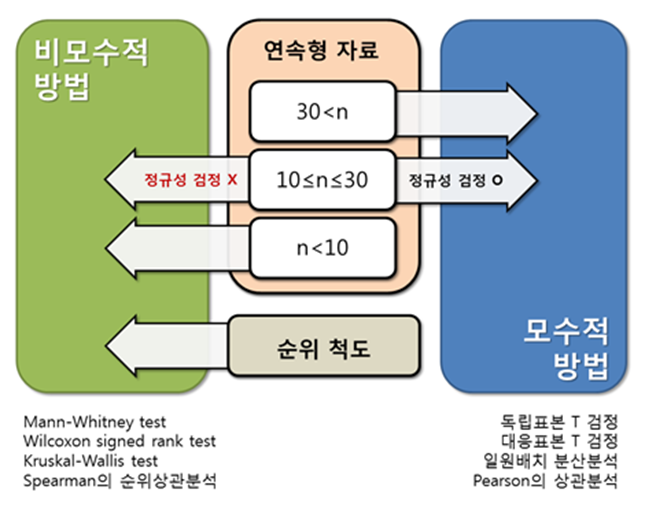

### 언제? N<30 , 정규성을 가정할 수 없는 경우
-관측된 자료가 특정분포를 따른다고 가정할 수 없는 경우. \
-관측된 자료의 수가 **30개 미만**으로 적은 경우.\
-자료가 개체간의 서열관계를 나타내는 경우.

### 어떻게? 관측값의 절대적인 크기에 의존하지 않는 관측값들의 순위나 두 관측값
 차이의 부호 등을 이용해 검정한다. \
'분포의 형태가 동일한지' 또는 '분포의 형태가 동일하지 않은지'와 같이 \
**분포의 형태**에 대해 설정한다.

### 종류? 
부호 검정(sign test) , 윌콕슨의 부호순위합검정(Wilcoxon signed rank test) ---- 1, paired 2 \
윌콕슨의 순위합검정(rank sum test) = 만-위트니의 U검정 ----- 2 samples 

런 검정(run test)  ----- 1sample \
스피어만의 순위상관계수  ----2 samples


### 정규분포 확인방법 : Shapiro값의 유의확률이나 Kolmogorov-Smirnov 유의확률
각각의 변수가 **0.05보다 낮은** 유의확률을 보일 때 귀무가설(정규분포이다) 기각하여 \
정규분포가 충족되지 않는다고 볼 수 있습니다 


In [ ]:
from scipy.stats import shapiro , normaltest , anderson , kstest

normal = []
notnormal = []
for var in num_var :
    stat, p  = shapiro(train[var].dropna().values)
    stat, p  = normaltest(train[var].dropna().values)
    alpha = 0.05
    if p > alpha :
        normal.append(var)
    else :
        notnormal.append(var)

## 부호검정

부호검정(sign test)이란?\
 **두 표본들의 분포가 동일한지 여부를 검정**\
부호검정은 +혹은 - 부호가 나올 확률 p를 0.5로 갖는 이항부호검정(Binominal sign test)라고도 불린다. \
이 검정 방법은 관측치의 플러스와 마이너스 부호의 방향에 기반하며, 관측치의 수치에 기반하지 않는다. 


### 부호검정의 가정
- 데이터의 분포는 정규분포를 따를 필요가 없다.
- 서로 다른 모집단이나 동일한 모집단으로부터 나온 2개의 표본이 필요하다.
- 2개의 표본이 동일한 모집단에서 나왔다면, 'before-after' sample과 같이 짝 지어진 샘플이어야 한다.

부호검정은 짝 지어진 관찰치들끼리 비교하여 위(+)인지 아래(-)인지만 검증하고 그 쌍의 차이를 측정하지는 않기 때문에 **약한 검정 방법**으로 본다. 반면, 이 방법은 최소한의 가정만을 사용하기 때문에 모수적 가정이 잘못되어 생기는 오류의 가능성이 적고, 부호에 기초한 방법이기 때문에 <u>이상치에 민감하지 않다 </u> 는 장점도 있다.


### 하나의 샘플로 부호검정을 하는 경우, 
귀무가설 : "두 집단의 분포는 차이가 없다 (동일하다)"이다. \
이 검정방법은 one sample t-test의 대안법(alternative)이다. \
모집단의 중위수(평균 또는 중앙값)와 표본의 관측치를 서로 빼서 나온 값이 양수이면 (+), 음수이면 (-)로 부호를 계산한다.

### 짝 지어진 샘플로 부호검정을 하는 경우,
 귀무가설은 : "두 집단의 분포는 차이가 없다 (동일하다)" 이다. \
 이 검정방법은 independent two sample t-test 혹은 paired t-test의 대안법이다. \
 짝 지어진 샘플들의 값을 빼서 나온 값이 양수이면 (+), 음수이면 (-)로 부호를 계산한다.


### 부호검정 예제 :  numpy, pandas, math 라이브러리 활용
 - set1은 휴가 전의 생산성
 - set2는 휴가 후의 생산성
 - 두 리스트는 전후 관계로 짝지어진 데이터이다. 
 
numpy를 사용하여 두 리스트를 array로 만들고, 부호를 계산했다.

In [48]:
set1=[83,85,75,91,80,75,90,65,78,85,83,75,78,80,82,88,85,80,78,81,70,80]
set2=[79,87,70,93,85,75,80,71,80,88,82,71,75,85,86,85,82,87,78,84,85,81]

print(type(set1))

#짝지어진 데이터 확인
print(len(set1), len(set2))

<class 'list'>
22 22


In [49]:
result = set2-set1 

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [50]:
set1=np.array(set1) #ndarray로 변환
set2=np.array(set2)
result = set2-set1
result

array([ -4,   2,  -5,   2,   5,   0, -10,   6,   2,   3,  -1,  -4,  -3,
         5,   4,  -3,  -3,   7,   0,   3,  15,   1])

In [54]:
import numpy as np
set1=np.array(set1) #ndarray로 변환
set2=np.array(set2)
 
result = set2-set1
signs=[]                  ## 빈 list생성
for value in result:
    if value<0:
        signs.append("-")
    elif value>0:
        signs.append("+")
    else:
        signs.append(0)

부호를 계산한 결과와 데이터를 pandas의 DataFrame 함수를 사용해 데이터프레임으로 정리

데이터프레임에 head함수를 사용하면 지정한 개수만큼의 행들을 확인할 수 있다.

여기서 (+)의 개수를 x로 놓고, 0을 제외한 (+)와 (-)의 개수의 합을 n으로 놓는다

In [56]:
import pandas as pd
#부호계산
df = pd.DataFrame({"set1":set1,"set2":set2,"signs":signs})
df

,set1,set2,signs
0,83,79,-
1,85,87,+
2,75,70,-
3,91,93,+
4,80,85,+
5,75,75,0
6,90,80,-
7,65,71,+
8,78,80,+
9,85,88,+


In [61]:
# x = (+)개수, n = 0을 제외한 +와 - 개수
x = df['signs'][df['signs']=="+"].count()
n = df['signs'][df['signs']=="-"].count() + x
print("x: %d, n: %d" %(x,n))

x: 12, n: 20


파이썬 math 라이브러리에는 팩토리얼(factorial)을 계산할 수 있는 함수가 있다.

팩토리얼 함수를 활용해서 해당 조건일 때의 p-value를 계산할 수 있다. 

일반적으로 n이 30 이하이면 이항분포표를 기준으로 검정하고, 30 초과이면 근사 정규분포로 검정한다.

In [62]:
from math import factorial as fac

# 귀무가설 : 휴가후의 생산량이 더 크지않다(차이가 없다)
# 대립가설: 휴가 후의 생산량이 더 크다(오른쪽 검정)

#방법1) p value를 계산해서 유의수준 0.05와 비교 (0.252는 0.05에 미치지못하므로 대립가설 기각)
#결론: 휴가 후의 생산량이 더 크지 않다

goal1=0
for i in range(x, n+1):
    if i != n:
        print (n, "C", i, "x 0.5^%d"%i, "x 0.5^%d"%(n-i),'+')
        goal1 += fac(n)/fac(i)/fac(n-i)
    else:
        print (n, "C", i, "x 0.5^%d"%i, "x 0.5^%d"%(n-i))
        goal1 += fac(n)/fac(i)/fac(n-i)
        
print(goal1)
print("=> %d번 수행 시 +가 %d번 이상 나올 확률" %(n,x))
print("= 오른쪽 검정 시 (right tail test) p-value: " , "%0.3f"%(goal1*(0.5)**n))

20 C 12 x 0.5^12 x 0.5^8 +
20 C 13 x 0.5^13 x 0.5^7 +
20 C 14 x 0.5^14 x 0.5^6 +
20 C 15 x 0.5^15 x 0.5^5 +
20 C 16 x 0.5^16 x 0.5^4 +
20 C 17 x 0.5^17 x 0.5^3 +
20 C 18 x 0.5^18 x 0.5^2 +
20 C 19 x 0.5^19 x 0.5^1 +
20 C 20 x 0.5^20 x 0.5^0
263950.0
=> 20번 수행 시 +가 12번 이상 나올 확률
= 오른쪽 검정 시 (right tail test) p-value:  0.252


 오른쪽 검정 기준으로 (+)가 12이상일 때의 p-value는 0.252로 유의수준 0.05의 기각역 안으로 들어오지 못 했다. 
 
 이에 따라 대립가설을 기각하고 귀무가설을 채택한다. 
 
 **결론은 "휴가 후의 생산량이 휴가 전보다 더 크지 않다"이다.**

In [96]:

from scipy.stats import wilcoxon, mannwhitneyu, spearmanr
import warnings
warnings.filterwarnings("ignore")

#순위합검정(만휘트니u테스트) 
print('순위합검정={:0.3f}'.format(mannwhitneyu(set1,set2).pvalue),'\n')

#윌콕슨 부호순위합검정
stat, p = wilcoxon(set1, set2)
print('윌콕슨 부호순위합검정={:0.3f}'.format(p1),'\n')

#스피어만
stat1,p1 = spearmanr(set1,set2)
print('스피어만 상관게수={:0.3f}'.format(p1))


순위합검정=0.251 

윌콕슨 부호순위합검정=0.002 

스피어만 상관게수=0.002


## Wilcoxon rank sum test(순위합검정) [= Mann-Whitney U-test]

### 윌콕슨 순위합검정(Wilcoxon rank sum test)이란?
 윌콕슨 순위합검정 역시 모집단의 분포를 모르는 경우, 시행하는 비모수적 검정방법이다. \
 이 검정방법은 **독립적인 두 표본**으로 검정하며,\
 **두 표본의 모집단의 중앙값이 동일한지**를 검정한다.\
 이에 따라 **귀무가설은 "두 표본의 중앙값은 차이가 없다"** 이고, 대립가설은 "두 표본의 중앙값은 차이가 있다"이다. \
 
 이 검정은 만-위트니 U검정(Mann-Whitney U-test)와 일치하며, independent two sample t-test의 대안법이다.


예제) V 반도체 회사는 공장 A와 공장 B 2개의 공장에서 반도체를 생산하고 있다. \
      이 때, 2개 공장의 생산 효율성에 차이가 있는지를 살펴본다.

#### 가설검정

	귀무가설 = **공장 A와 공장 B의 생산효율성은 동일하다**

	연구가설 = 공장 A와 공장 B의 생산효율성은 다르다.

In [16]:
import pandas as pd
from scipy.stats import mannwhitneyu

x = [12, 11, 13, 14, 15]
y = [16, 15, 17, 19, 20]

print(mannwhitneyu(x, y))

# 생산량 평균 순위 출력
xy = pd.DataFrame(x+y)
xy['생산량 순위'] = xy.rank(ascending=False)
xy['공장이름'] = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
print(xy.groupby('공장이름').mean())


MannwhitneyuResult(statistic=0.5, pvalue=0.007985348176890053)
         0  생산량 순위
공장이름              
A     13.0     7.9
B     17.4     3.1


In [40]:
import pandas as pd
from scipy.stats import mannwhitneyu

x = [12, 11, 13, 14, 15]
y = [16, 15, 17, 19, 20]

print(mannwhitneyu(x, y))

# 생산량 평균 순위 출력
xy = pd.DataFrame(x+y)
xy['생산량 순위'] = xy.rank(ascending=False)
xy['공장이름'] = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
print(xy.filter([0,'공장이름']).groupby('공장이름').mean()) # 순위를 제외한 컬럼만 filter
xy

MannwhitneyuResult(statistic=0.5, pvalue=0.007985348176890053)
         0
공장이름      
A     13.0
B     17.4


,0,생산량 순위,공장이름
0,12,9.0,A
1,11,10.0,A
2,13,8.0,A
3,14,7.0,A
4,15,5.5,A
5,16,4.0,B
6,15,5.5,B
7,17,3.0,B
8,19,2.0,B
9,20,1.0,B


	검정통계량이 0.5 그리고 유의확률은 0.0079이므로 귀무가설을 기각한다.

	즉, **A와 B의 공장 생산의 효율성은 다르며**, A의 효율성이 떨어지는 것을 볼 수 있다.


## Wilcoxon Signed-Rank Test (부호순위합검정)

In [15]:
#예제1

In [12]:

# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


In [14]:
#예제2

가설 검증

배경: 기존의 물류 알고리즘보다 개선되었다고 

알려진 새로운 물류 경로 최적화 알고리즘을 도입해 상품의 배송시간을 단축하고자 한다.


귀무가설: 기존 물류 알고리즘과 신규 알고리즘간을 통한 평균 배송시간은**차이가 없다.**

대립가설: 기존 물류 알고리즘과 신규 알고리즘간을 통한 평균 배송시간은 차이가 있다.

In [13]:

from scipy.stats import wilcoxon

x = [10, 30, 9, 21, 35, 12, 17]
y = [8, 27, 16, 25, 30, 13, 11]

wilcoxon(x, y)

WilcoxonResult(statistic=12.0, pvalue=0.8125)

검정 통계량이 12.0, p-value은 0.8125로 출력되었는데, 

이는 귀무가설을 기각하지 못하므로 신규 알고리즘을 도입할 필요가 없다.

## RUN 검정

 **표본의 배열이 무작위로 구성되어 있는지 검정**

가설검정

귀무가설: 멤버십 소지 고객과 비소지 고객의 방문은 **무작위로 이루어짐**

연구가설: 멤버십 소지 고객과 비소지 고객의 방문은 무작위로 이루어지지
않음

In [19]:
from statsmodels.sandbox.stats.runs import Runs
import numpy as np

x = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0]
x = np.array(x)

Runs(x).runs_test()

(-1.8277470669267506, 0.06758752074917526)

z값의 공식은 (RUN의 개수 - RUN의 평균) + 0.5 / RUN의 표준편차 

평균 및 표준편차를 구하는 방식은 모수의 방식과 다르다 (주의)

-1.8은 z값을 의미하고, p 값은 0.067로 도출됨으로 유의수준 0.1 수준에서 유의하다.

즉, 연구가설을 채택: 공정하게 이루어지지 않았음을 의미

## 스피어만의 순위상관계수

   -두 변수가 정규성을 만족하지 않는 경우 혹은 변수가 순위 및 순서 형태로 주어지는 경우.

   -(실제 값을 사용하는 대신) 데이터에 순위를 매긴 후 그 순위에 대한 상관계수를 산출 - 비모수적 방법)

   -상관계수는 -1부터 1사이 값

   -비선형 관계의 연관성 파악 가능

   -연속형/이산형/순서형 자료적용가능

In [14]:
#예제1

H0: the two samples are **independent.**
    
H1: there is a dependency between the samples.

In [22]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


In [14]:
#예제2

https://blog.naver.com/breezehome50/222353492058

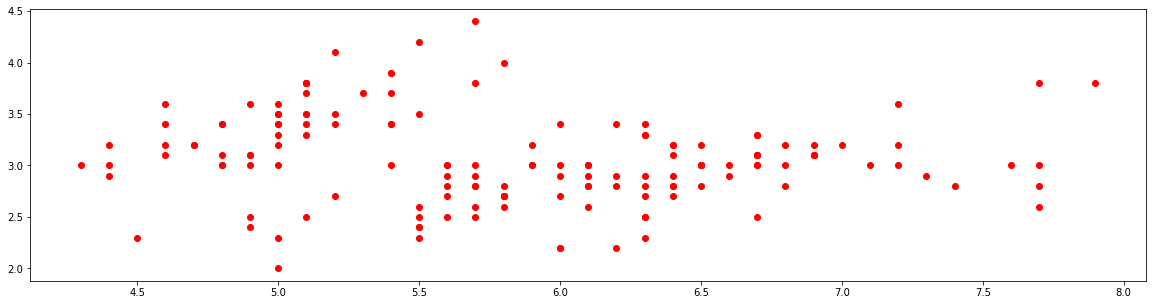

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

plt.figure(figsize=(20,5))
plt.scatter(iris['sepal_length'],iris['sepal_width'], color='red')
plt.show()

스피어만 상관계수는 기본적으로 피어슨 상관계수와 같은 원리로 산출됩니다.

다만, 피어슨 상관계수와 달리 한가지 과정이 추가됩니다. 

피어슨 상관계수는 원 데이터 수치값을 그대로 활용하는 반면 스피어슨 상관계수는 **데이터의 순서통계량 값을 활용**하여 순서값의 피어슨 상관계수라고 생각하시면 됩니다. 

즉, X변수내의 데이터에서 제일 큰 값을 1, 두번째 큰 값을 2 등등으로 변환시키고, 

Y변수도 동일하게 변환시킨 후 변환된 값들간의 피어슨 상관계수라고 생각하시면 됩니다. 

In [24]:
import scipy.stats as stats

rho, p_val = stats.spearmanr(iris['sepal_length'], iris['sepal_width'])
print("correlation coefficient : {}, p-value : {}".format(rho, p_val))


correlation coefficient : -0.166777658283235, p-value : 0.04136799424884587


첫번째 값은 스피어만 상관계수 값이며 두번째 값은 p-value값입니다. 

p-value가 0.04수준으로 유의수준 0.05(5%)하에서 상관계수가 0이 아니라고 말할 수 있습니다. 

즉, 상관계수는 0이라는 귀무가설을 기각할 수 있습니다. 